In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Series

In [3]:
prices = [42.8, 102.03, 240.38, 80.9]
s = pd.Series(prices)
print(s)

0     42.80
1    102.03
2    240.38
3     80.90
dtype: float64


In [4]:
print(s.describe())

count      4.000000
mean     116.527500
std       86.129132
min       42.800000
25%       71.375000
50%       91.465000
75%      136.617500
max      240.380000
dtype: float64


In [5]:
# DataFrame

In [6]:
data = {
    'date': ['2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13'],
    'prices': [42.8, 102.03, 240.38, 80.9]
}
df = pd.DataFrame(data)
print(df)

         date  prices
0  2021-06-10   42.80
1  2021-06-11  102.03
2  2021-06-12  240.38
3  2021-06-13   80.90


In [7]:
# Web Scraping

In [8]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
print("All Tables as DataFrame\n")
print(data)

All Tables as DataFrame

[    Symbol            Security SEC filings             GICS Sector  \
0      MMM                  3M     reports             Industrials   
1      AOS         A. O. Smith     reports             Industrials   
2      ABT              Abbott     reports             Health Care   
3     ABBV              AbbVie     reports             Health Care   
4     ABMD             Abiomed     reports             Health Care   
..     ...                 ...         ...                     ...   
500    YUM         Yum! Brands     reports  Consumer Discretionary   
501   ZBRA  Zebra Technologies     reports  Information Technology   
502    ZBH       Zimmer Biomet     reports             Health Care   
503   ZION       Zions Bancorp     reports              Financials   
504    ZTS              Zoetis     reports             Health Care   

                      GICS Sub-Industry    Headquarters Location  \
0              Industrial Conglomerates    Saint Paul, Minnesota 

In [9]:
df = data[0]
print(df)

    Symbol            Security SEC filings             GICS Sector  \
0      MMM                  3M     reports             Industrials   
1      AOS         A. O. Smith     reports             Industrials   
2      ABT              Abbott     reports             Health Care   
3     ABBV              AbbVie     reports             Health Care   
4     ABMD             Abiomed     reports             Health Care   
..     ...                 ...         ...                     ...   
500    YUM         Yum! Brands     reports  Consumer Discretionary   
501   ZBRA  Zebra Technologies     reports  Information Technology   
502    ZBH       Zimmer Biomet     reports             Health Care   
503   ZION       Zions Bancorp     reports              Financials   
504    ZTS              Zoetis     reports             Health Care   

                      GICS Sub-Industry    Headquarters Location  \
0              Industrial Conglomerates    Saint Paul, Minnesota   
1                     B

In [10]:
# Web Scraping

In [11]:
df1 = df[['Symbol', 'Security']]
print(df1)

    Symbol            Security
0      MMM                  3M
1      AOS         A. O. Smith
2      ABT              Abbott
3     ABBV              AbbVie
4     ABMD             Abiomed
..     ...                 ...
500    YUM         Yum! Brands
501   ZBRA  Zebra Technologies
502    ZBH       Zimmer Biomet
503   ZION       Zions Bancorp
504    ZTS              Zoetis

[505 rows x 2 columns]


In [12]:
df2 = df1[df['Security'] == 'Apple']
print(df2)

   Symbol Security
46   AAPL    Apple


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 505 non-null    object
 1   Security               505 non-null    object
 2   SEC filings            505 non-null    object
 3   GICS Sector            505 non-null    object
 4   GICS Sub-Industry      505 non-null    object
 5   Headquarters Location  505 non-null    object
 6   Date first added       457 non-null    object
 7   CIK                    505 non-null    int64 
 8   Founded                505 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB
None


In [14]:
# Yahoo Finance Tesla Profile

In [15]:
url_link = 'https://finance.yahoo.com/quote/TSLA/profile'
r = requests.get(url_link, headers={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
data = pd.read_html(r.text)
print(data)

[                       Name                                        Title  \
0          Mr. Elon R. Musk          Technoking of Tesla, CEO & Director   
1   Mr. Zachary J. Kirkhorn                         Master of Coin & CFO   
2     Mr. Andrew D. Baglino    Sr. VP of Powertrain & Energy Engineering   
3        Mr. Vaibhav Taneja  Corp. Controller & Chief Accounting Officer   
4         Mr. Martin Viecha          Sr. Director for Investor Relations   
5         Mr. Alan Prescott                                  VP of Legal   
6           Mr. Dave Arnold        Sr. Director of Global Communications   
7              Brian Scelfo                 Sr. Director of Corp. Devel.   
8   Mr. Jeffrey B. Straubel                                  Sr. Advisor   
9  Mr. Franz von Holzhausen                               Chief Designer   

       Pay Exercised  Year Born  
0      NaN       NaN     1972.0  
1  300.76k     4.19M     1985.0  
2  283.27k    14.86M     1981.0  
3      NaN       NaN     1

In [16]:
# Yahoo Finance Tesla Analysis

In [17]:
url_link = 'https://finance.yahoo.com/quote/TSLA/analysis?p=TSLA'
r = requests.get(url_link, headers={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
data = pd.read_html(r.text)
data = data[0]
print(data)

  Earnings Estimate  Current Qtr. (Mar 2022)  Next Qtr. (Jun 2022)  \
0   No. of Analysts                    14.00                 13.00   
1     Avg. Estimate                     2.15                  2.34   
2      Low Estimate                     1.58                  1.42   
3     High Estimate                     2.68                  3.10   
4      Year Ago EPS                     0.93                  1.45   

   Current Year (2022)  Next Year (2023)  
0                33.00             23.00  
1                 9.33             11.73  
2                 6.17              6.00  
3                12.66             16.50  
4                 6.78              9.33  


  Earnings Estimate  Current Qtr. (Mar 2022)  Next Qtr. (Jun 2022)  \
1     Avg. Estimate                     2.15                  2.34   

   Current Year (2022)  Next Year (2023)  
1                 9.33             11.73  


<AxesSubplot:>

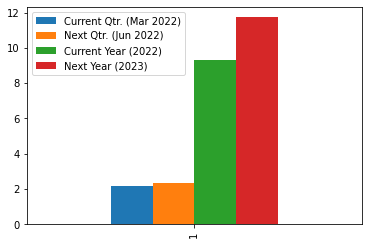

In [18]:
data1 = data[data['Earnings Estimate'] == 'Avg. Estimate']
print(data1)
data1.plot(kind='bar')

In [19]:
# yFinance

In [20]:
data = yf.Ticker("TSLA")

In [21]:
print(data.info['profitMargins'])
print(data.info['returnOnEquity'])

0.07403
0.15641


In [27]:
# No Data Available then Error in Jupiter Notebook
# show dividends
#print(data.dividends)
# show splits
#print(data.splits)

In [28]:
# show balance sheet
print(data.balance_sheet)

                             2020-12-31    2019-12-31    2018-12-31  \
Intangible Assets          3.130000e+08  3.390000e+08  2.820000e+08   
Capital Surplus            2.726000e+10  1.273600e+10  1.024900e+10   
Total Liab                 2.846900e+10  2.619900e+10  2.342700e+10   
Total Stockholder Equity   2.222500e+10  6.618000e+09  4.923000e+09   
Minority Interest          1.454000e+09  1.492000e+09  1.390000e+09   
Other Current Liab         4.147000e+09  3.693000e+09  2.955000e+09   
Total Assets               5.214800e+10  3.430900e+10  2.974000e+10   
Common Stock               1.000000e+06  1.000000e+06           NaN   
Other Current Assets       2.380000e+08  2.460000e+08  1.930000e+08   
Retained Earnings         -5.399000e+09 -6.083000e+09 -5.318000e+09   
Other Liab                 3.302000e+09  2.969000e+09  2.318000e+09   
Good Will                  2.070000e+08  1.980000e+08  6.800000e+07   
Treasury Stock             3.630000e+08 -3.600000e+07 -8.000000e+06   
Other 

In [29]:
# show cashflow
print(data.cashflow)

                                             2020-12-31    2019-12-31  \
Change To Liabilities                      2.423000e+09  1.447000e+09   
Total Cashflows From Investing Activities -3.132000e+09 -1.436000e+09   
Net Borrowings                            -2.488000e+09  7.980000e+08   
Total Cash From Financing Activities       9.973000e+09  1.529000e+09   
Change To Operating Activities            -1.165000e+09 -1.000000e+09   
Issuance Of Stock                          1.268600e+10  1.111000e+09   
Net Income                                 7.210000e+08 -8.620000e+08   
Change In Cash                             1.311800e+10  2.506000e+09   
Effect Of Exchange Rate                    3.340000e+08  8.000000e+06   
Total Cash From Operating Activities       5.943000e+09  2.405000e+09   
Depreciation                               2.322000e+09  2.092000e+09   
Other Cashflows From Investing Activities  1.230000e+08  4.600000e+07   
Change To Inventory                       -4.220000

In [30]:
# show earnings
print(data.earnings)

          Revenue    Earnings
Year                         
2017  11759000000 -1962000000
2018  21461000000  -976000000
2019  24578000000  -862000000
2020  31536000000   721000000


In [31]:
x = data.earnings
print(x)

          Revenue    Earnings
Year                         
2017  11759000000 -1962000000
2018  21461000000  -976000000
2019  24578000000  -862000000
2020  31536000000   721000000


<AxesSubplot:xlabel='Year'>

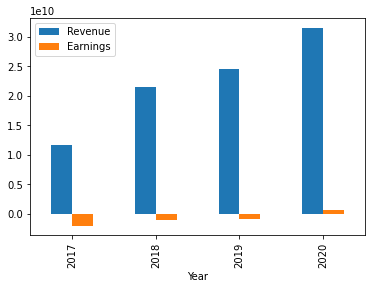

In [32]:
x.plot(kind="bar")

In [33]:
# Company Data

In [35]:
x = data.recommendations
x = x[x.index > '2022-01-01']
print(x)

                              Firm        To Grade From Grade Action
Date                                                                
2022-01-03 14:17:31    RBC Capital  Sector Perform              main
2022-01-03 16:33:41      JP Morgan     Underweight              main
2022-01-03 17:54:18  Deutsche Bank             Buy              main
2022-01-05 14:03:16         Mizuho             Buy              main
2022-01-05 14:17:09       Barclays     Underweight              main
2022-01-18 13:14:03  Credit Suisse         Neutral              main
2022-01-27 11:48:27      JP Morgan     Underweight              main
2022-01-27 11:53:32    Wells Fargo    Equal-Weight              main
2022-01-27 14:14:58      Citigroup            Sell              main


In [36]:
def RoE(ticker):
    data = yf.Ticker(ticker)
    roe = data.info['returnOnEquity']
    name = data.info['shortName']
    print(name, ":", roe)

RoE('AAPL')
RoE('MSFT')

Apple Inc. : 1.47443
Microsoft Corporation : 0.49051
